In [1]:
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd

from unc_tools import UncRegression, Hyper, FunctionBase1D



In [2]:
df = pd.read_csv("velocities.csv")

df['r0'] = [unc.ufloat_fromstr(x) for x in df.r0]

df

,S0,r0
0,0.0030,(1.51+/-0.14)e-05
1,0.0045,(1.61+/-0.07)e-05
2,0.0075,(1.99+/-0.11)e-05
3,0.0150,(2.14+/-0.13)e-05
4,0.0225,(2.20+/-0.15)e-05


In [3]:
UncRegression.latex_style(True)

<Axes: >

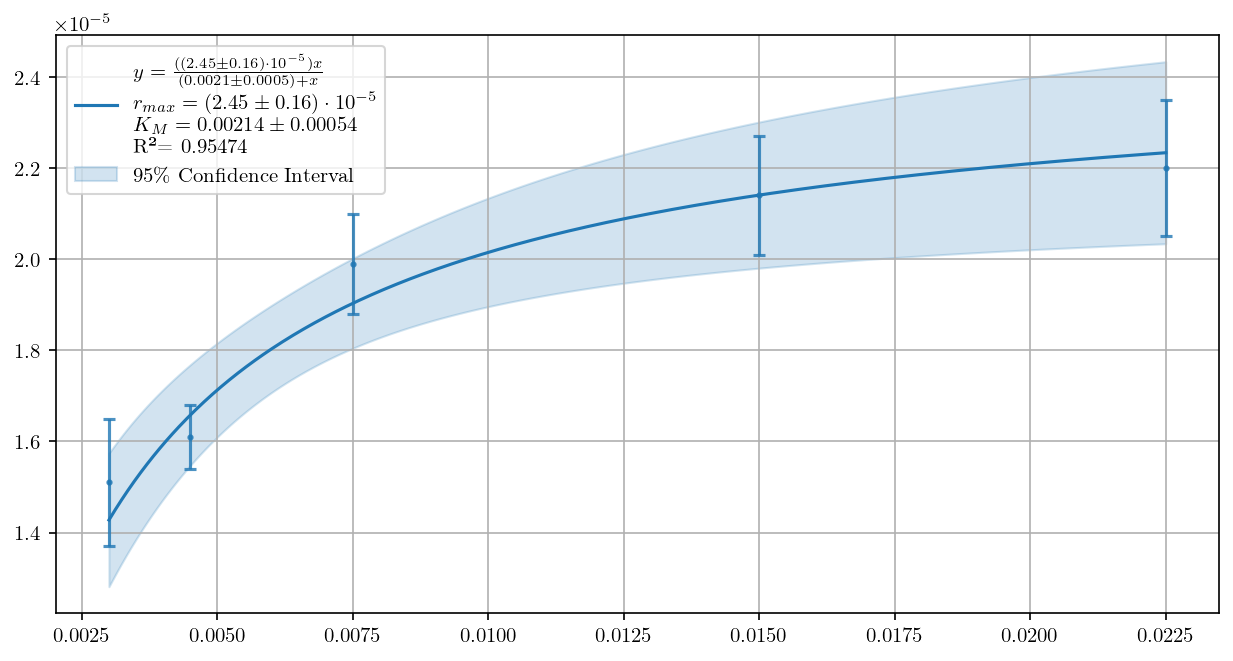

In [4]:
reg = UncRegression(df.S0, df.r0, func = "r_max * x / (K_M + x)")

reg.plot(show_band=True, show_coefficients=True)

In [5]:
K_m1 = reg.coefs[1]

K_m1

0.002139460808514881+/-0.000536598222856861

In [6]:
r_max = reg.predict(100)

r_half = r_max / 2

K_m2 = reg.find_x(r_half)

K_m3 = reg.find_x(r_half, x0 = 0.001)

K_m1, K_m2, K_m3

(1.22+/-0.08)e-05


(0.002139460808514881+/-0.000536598222856861,
 0.0021393692665808654+/-0.0006641356324731521,
 0.0021393692665808654+/-0.0003067686284169732)